<a href="https://colab.research.google.com/github/yuvarani20056/Cracking-the-market-code-with-AI--driven/blob/main/Yuva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0642
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 8.5192e-04
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 5.1084e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 5.0252e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 4.8068e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.9251e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 5.1090e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 4.6408e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 4.5903e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.8344e-04
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


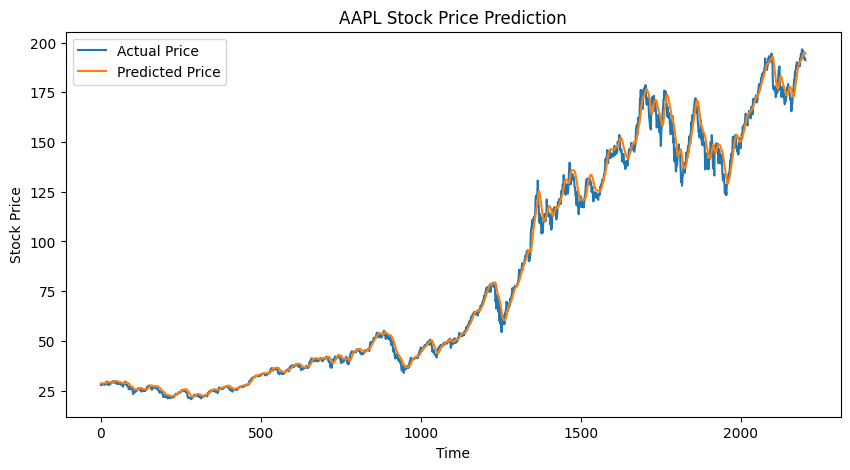

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 1: Load Stock Price Data
def load_data(stock_symbol, start_date, end_date):
    df = yf.download(stock_symbol, start=start_date, end=end_date)
    return df[['Close']]

# Step 2: Preprocess Data
def preprocess_data(df, time_step=60):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    X, y = [], []
    for i in range(time_step, len(scaled_data)):
        X.append(scaled_data[i - time_step:i, 0])
        y.append(scaled_data[i, 0])

    X = np.array(X)
    y = np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Step 3: Build the LSTM Model
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 4: Plot Predictions
def plot_predictions(actual, predicted, title='Stock Price Prediction'):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label='Actual Price')
    plt.plot(predicted, label='Predicted Price')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Step 5: Main Function
if __name__ == '__main__':
    stock = 'AAPL'
    start = '2015-01-01'
    end = '2024-01-01'
    time_step = 60

    data = load_data(stock, start, end)
    X, y, scaler = preprocess_data(data, time_step)
    model = build_model((X.shape[1], 1))

    model.fit(X, y, epochs=10, batch_size=64, verbose=1)

    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)
    actual = scaler.inverse_transform(y.reshape(-1, 1))

    plot_predictions(actual, predictions, f'{stock} Stock Price Prediction')